# Name- Keisha Mehta
Task- Predict the percentage of an student based on the number of study hours.

### IMPORTING MODULES
Importing the required modules.

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

### IMPORTING DATASET
We import the dataset using pandas. 

In [ ]:
%matplotlib inline
data="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(data)
df.set_index(["Hours","Scores"])
x=df["Hours"]
y=df["Scores"]
print("Data imported successfully")
print(df)

### PLOTTING THE SCATTER DIAGRAM
By analysing the given data, it is clear that the scores are dependent on the number of hours of study. Both the variables have discrete values. We can plot a scatter diagram to find a relationship between them.


In [ ]:
df.plot()
df.plot(kind="scatter", x= "Hours", y="Scores")


From the diagram, it is clear that the two variables are positively correlated. The scores and the number of hours of study have a strong positive correlation between them. (ie: between 0.8 and 1)

### FINDING THE CORRELATION COEFFICIENT
#### (METHOD 1)

In [5]:
rho = np.corrcoef(x, y)
print(rho)

[[1.         0.97619066]
 [0.97619066 1.        ]]


The following is the output correlation matrix. Note the ones on the diagonals, indicating that the correlation coefficient of a variable with itself is one. Karl Pearson's Correlation Coefficient (rho)= 0.97619066

#### (METHOD 2)

In [12]:
corcoeff=df.corr(method="pearson")["Hours"]["Scores"]
print("Karl Pearson's corellation coefficient is: ",corcoeff)

Karl Pearson's corellation coefficient is:  0.9761906560220888


### TRAIN AND TEST DATA
We have split our data into training and testing sets, and we train our algorithm.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) 
lin_reg = LinearRegression()
lin_reg.fit(x_train.values.reshape(-1,1), y_train) 
print("Via the sklearn model, ")
print("The slope is {0} and the intercept is {1}. The equation is y={0:.4f}x+{1:.4f}".format(lin_reg.coef_[0],lin_reg.intercept_))

Via the sklearn model, 
The slope is 9.906331538279616 and the intercept is 2.0697473355277296. The equation is y=9.9063x+2.0697


### REGRESSION LINE

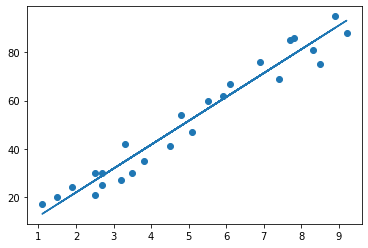

In [9]:
line=lin_reg.coef_*x+lin_reg.intercept_
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

### MAKING PREDICTIONS

In [27]:
predicted_val=lin_reg.predict(x_test.values.reshape(-1,1))
print("By Sklearn Model, R2 score is: ")
print(r2_score(y_test,predicted_val))

By Sklearn Model, R2 score is: 
0.9308756616076596


### ESTIMATING THE SCORES
Our linear regression model can now be used to estimate the values of y (Scores) using given values of x (Number of hours of study). Thus, to predicted the score if a student studies for 9.25 hrs/ day, we simply substitute x= 9.25 in the equation.

In [11]:
answer=lin_reg.predict([[9.25]])
print("The predicted score of the student is: ")
print(answer[0], "marks")

The predicted score of the student is: 
93.70331406461418 marks
